In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
ctl_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_mean.nc')
ctl_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_mean.nc')
ctl_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_mean.nc')
flat_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_flat_mean.nc')
flat_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_flat_mean.nc')
flat_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_flat_mean.nc')
strat_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_strat_mean.nc')
strat_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_strat_mean.nc')
strat_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_strat_mean.nc')
nostrat_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_nostrat_mean.nc')
nostrat_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_nostrat_mean.nc')
nostrat_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_nostrat_mean.nc')
highocean_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_highocean_mean.nc')
highocean_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_highocean_mean.nc')
highocean_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_highocean_mean.nc')
lowland_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry_lowland_mean.nc')
lowland_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap05_freezedry_lowland_mean.nc')
lowland_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap05_freezedry_lowland_mean.nc')
evap1_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap1_freezedry_mean.nc')
evap1_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb0075_landalb2_evap1_freezedry_mean.nc')
evap1_2700 = xr.open_dataset('./../data_isca/eocene_T42_GA7_2700ppm_alb0075_landalb2_evap1_freezedry_mean.nc')
alb05_300 = xr.open_dataset('./../data_isca/eocene_T42_GA7_300ppm_alb005_landalb2_evap05_freezedry_mean.nc')
alb05_1800 = xr.open_dataset('./../data_isca/eocene_T42_GA7_1800ppm_alb005_landalb2_evap05_freezedry_mean.nc')
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"
land=ctl_300.ml_heat_cap.mean('months') < 8257740
ocean=ctl_300.ml_heat_cap.mean('months') > 8257740

# flat has low land clouds!

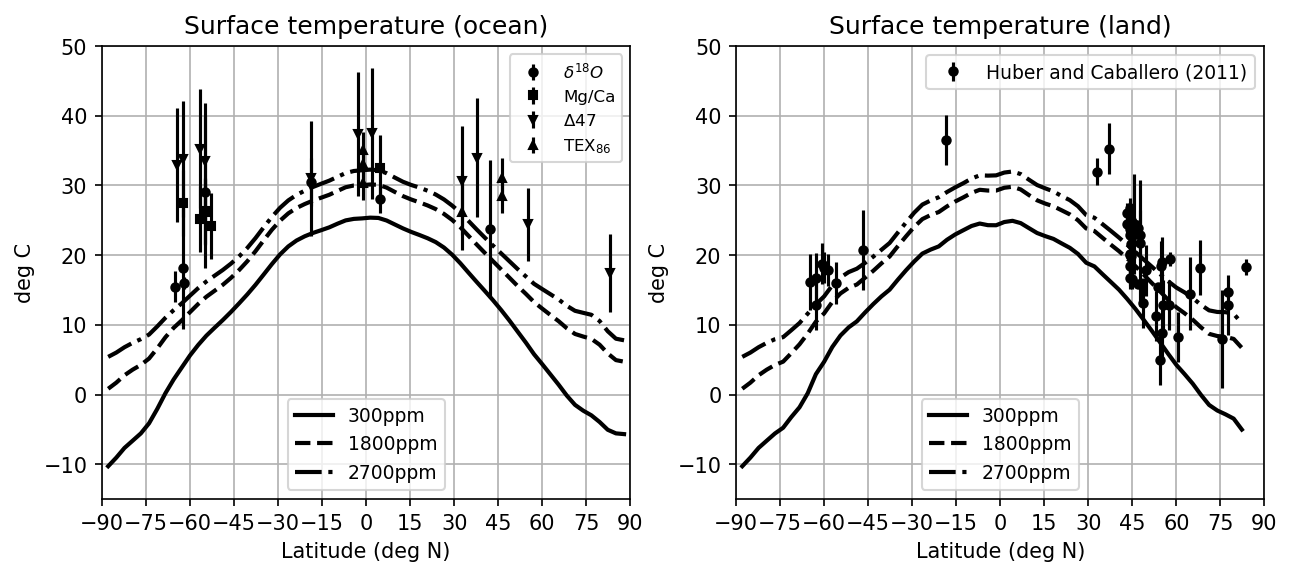

In [5]:
fig = plt.figure(figsize=(10,4),dpi=150)
ax1 = fig.add_subplot(121)

(ctl_300.t_surf-273).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(ctl_2700.t_surf-273).mean(('months','lon')).plot(c='k',label='2700ppm',ls='-.',lw=2)

import pandas as pd
proxy = pd.read_csv('/disco/share/mh920/data_eocene/eocene.csv').to_xarray().set_coords(('Paleolat_herold'))
err0 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==1),y=proxy.SST,yerr=proxy.lowerE,fmt='o',c='k',markersize=4)
err1 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==2),y=proxy.SST,yerr=proxy.lowerE,fmt='s',c='k',markersize=4)
err2 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==3),y=proxy.SST,yerr=proxy.lowerE,fmt='v',c='k',markersize=4)
err3 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==4),y=proxy.SST,yerr=proxy.lowerE,fmt='^',c='k',markersize=4)
leg1 = plt.legend([err0, err1, err2, err3], ['$\delta^{18}O$','Mg/Ca','$\Delta 47$','TEX$_{86}$'],loc='best',fontsize=8)
ax1.add_artist(leg1)

plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (ocean)')
plt.grid()
plt.legend(fontsize=9,loc='lower center')

proxy = pd.read_csv('/disco/share/mh920/data_eocene/Huber_data.csv',header=None).T.to_xarray()

ax2 = fig.add_subplot(122)
(ctl_300.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(ctl_2700.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='2700ppm',ls='-.',lw=2)
err = plt.errorbar(x=proxy[0].values,y=proxy[2].values,yerr=proxy[3].values,fmt='o',c='k',markersize=4)
leg2 = plt.legend([err], ['Huber and Caballero (2011)'],loc='upper right',fontsize=9)
plt.legend(loc='lower center',fontsize=9)
ax2.add_artist(leg2)
plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (land)')
plt.grid()
plt.show()

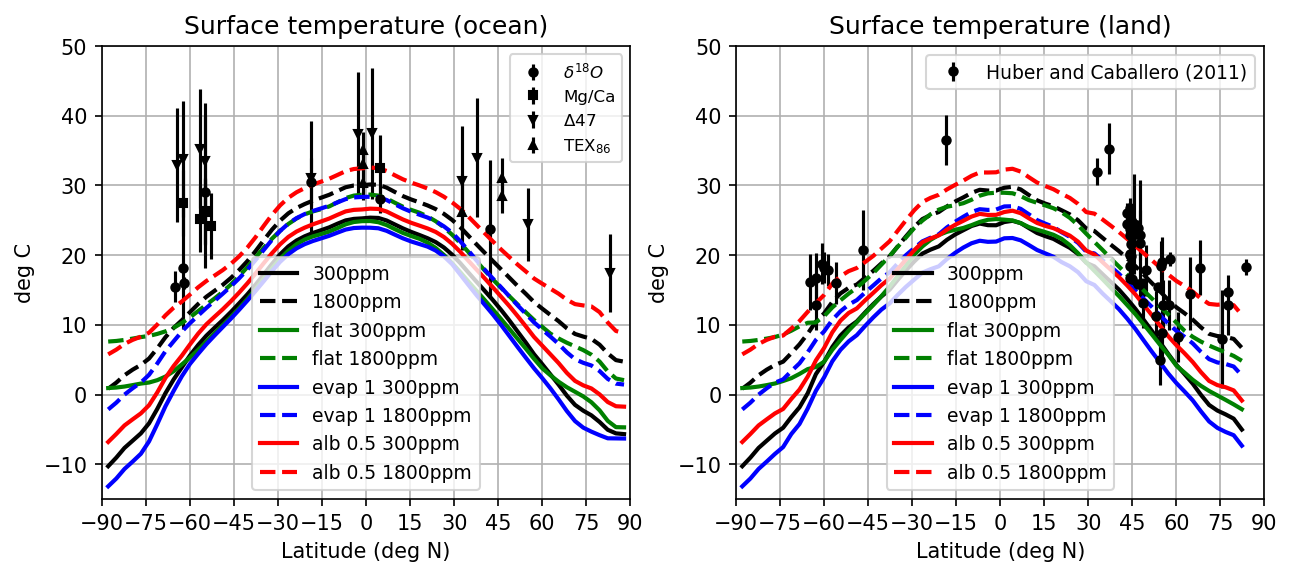

In [6]:
fig = plt.figure(figsize=(10,4),dpi=150)
ax1 = fig.add_subplot(121)

(ctl_300.t_surf-273).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(flat_300.t_surf-273).mean(('months','lon')).plot(c='g',label='flat 300ppm',lw=2)
(flat_1800.t_surf-273).mean(('months','lon')).plot(c='g',label='flat 1800ppm',ls='--',lw=2)
(evap1_300.t_surf-273).mean(('months','lon')).plot(c='b',label='evap 1 300ppm',lw=2)
(evap1_1800.t_surf-273).mean(('months','lon')).plot(c='b',label='evap 1 1800ppm',ls='--',lw=2)
(alb05_300.t_surf-273).mean(('months','lon')).plot(c='r',label='alb 0.5 300ppm',lw=2)
(alb05_1800.t_surf-273).mean(('months','lon')).plot(c='r',label='alb 0.5 1800ppm',ls='--',lw=2)

import pandas as pd
proxy = pd.read_csv('/disco/share/mh920/data_eocene/eocene.csv').to_xarray().set_coords(('Paleolat_herold'))
err0 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==1),y=proxy.SST,yerr=proxy.lowerE,fmt='o',c='k',markersize=4)
err1 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==2),y=proxy.SST,yerr=proxy.lowerE,fmt='s',c='k',markersize=4)
err2 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==3),y=proxy.SST,yerr=proxy.lowerE,fmt='v',c='k',markersize=4)
err3 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==4),y=proxy.SST,yerr=proxy.lowerE,fmt='^',c='k',markersize=4)
leg1 = plt.legend([err0, err1, err2, err3], ['$\delta^{18}O$','Mg/Ca','$\Delta 47$','TEX$_{86}$'],loc='best',fontsize=8)
ax1.add_artist(leg1)

plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (ocean)')
plt.grid()
plt.legend(fontsize=9,loc='lower center')

proxy = pd.read_csv('/disco/share/mh920/data_eocene/Huber_data.csv',header=None).T.to_xarray()

ax2 = fig.add_subplot(122)
(ctl_300.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(flat_300.t_surf-273).where(land).mean(('months','lon')).plot(c='g',label='flat 300ppm',lw=2)
(flat_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='g',label='flat 1800ppm',ls='--',lw=2)
(evap1_300.t_surf-273).where(land).mean(('months','lon')).plot(c='b',label='evap 1 300ppm',lw=2)
(evap1_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='b',label='evap 1 1800ppm',ls='--',lw=2)
(alb05_300.t_surf-273).where(land).mean(('months','lon')).plot(c='r',label='alb 0.5 300ppm',lw=2)
(alb05_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='r',label='alb 0.5 1800ppm',ls='--',lw=2)
err = plt.errorbar(x=proxy[0].values,y=proxy[2].values,yerr=proxy[3].values,fmt='o',c='k',markersize=4)
leg2 = plt.legend([err], ['Huber and Caballero (2011)'],loc='upper right',fontsize=9)
plt.legend(loc='lower center',fontsize=9)
ax2.add_artist(leg2)
plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (land)')
plt.grid()
plt.show()

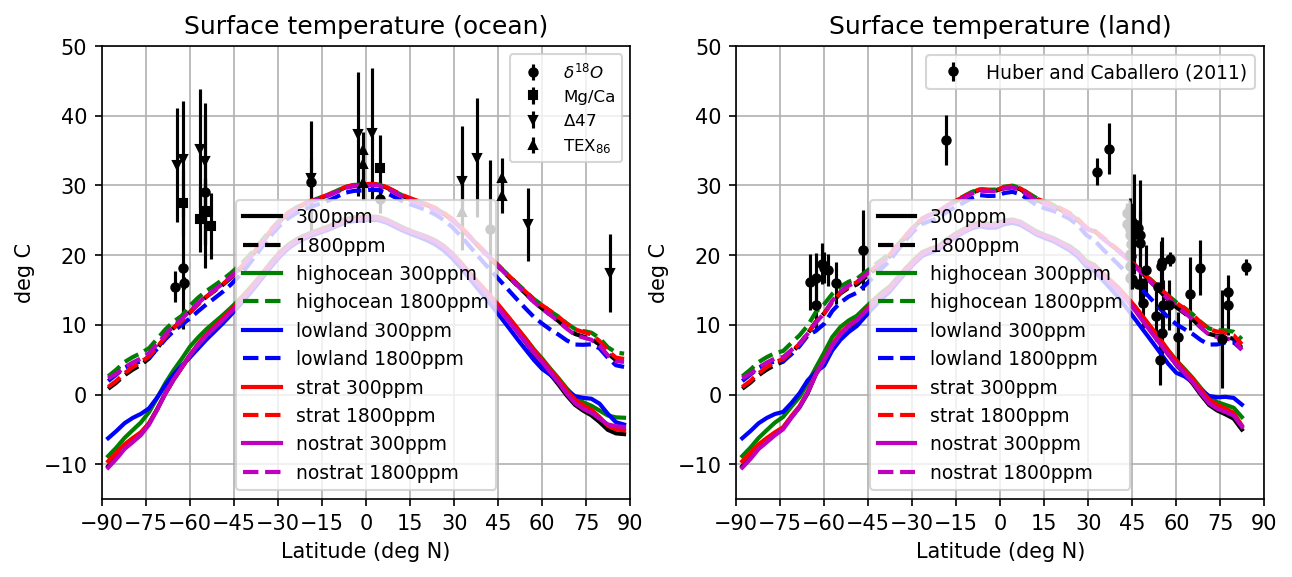

In [7]:
fig = plt.figure(figsize=(10,4),dpi=150)
ax1 = fig.add_subplot(121)

(ctl_300.t_surf-273).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(highocean_300.t_surf-273).mean(('months','lon')).plot(c='g',label='highocean 300ppm',lw=2)
(highocean_1800.t_surf-273).mean(('months','lon')).plot(c='g',label='highocean 1800ppm',ls='--',lw=2)
(lowland_300.t_surf-273).mean(('months','lon')).plot(c='b',label='lowland 300ppm',lw=2)
(lowland_1800.t_surf-273).mean(('months','lon')).plot(c='b',label='lowland 1800ppm',ls='--',lw=2)
(strat_300.t_surf-273).mean(('months','lon')).plot(c='r',label='strat 300ppm',lw=2)
(strat_1800.t_surf-273).mean(('months','lon')).plot(c='r',label='strat 1800ppm',ls='--',lw=2)
(nostrat_300.t_surf-273).mean(('months','lon')).plot(c='m',label='nostrat 300ppm',lw=2)
(nostrat_1800.t_surf-273).mean(('months','lon')).plot(c='m',label='nostrat 1800ppm',ls='--',lw=2)

import pandas as pd
proxy = pd.read_csv('/disco/share/mh920/data_eocene/eocene.csv').to_xarray().set_coords(('Paleolat_herold'))
err0 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==1),y=proxy.SST,yerr=proxy.lowerE,fmt='o',c='k',markersize=4)
err1 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==2),y=proxy.SST,yerr=proxy.lowerE,fmt='s',c='k',markersize=4)
err2 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==3),y=proxy.SST,yerr=proxy.lowerE,fmt='v',c='k',markersize=4)
err3 = plt.errorbar(x=proxy.Paleolat_herold.where(proxy.Type==4),y=proxy.SST,yerr=proxy.lowerE,fmt='^',c='k',markersize=4)
leg1 = plt.legend([err0, err1, err2, err3], ['$\delta^{18}O$','Mg/Ca','$\Delta 47$','TEX$_{86}$'],loc='best',fontsize=8)
ax1.add_artist(leg1)

plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (ocean)')
plt.grid()
plt.legend(fontsize=9,loc='lower center')

proxy = pd.read_csv('/disco/share/mh920/data_eocene/Huber_data.csv',header=None).T.to_xarray()

ax2 = fig.add_subplot(122)
(ctl_300.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='300ppm',lw=2)
(ctl_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='k',label='1800ppm',ls='--',lw=2)
(highocean_300.t_surf-273).where(land).mean(('months','lon')).plot(c='g',label='highocean 300ppm',lw=2)
(highocean_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='g',label='highocean 1800ppm',ls='--',lw=2)
(lowland_300.t_surf-273).where(land).mean(('months','lon')).plot(c='b',label='lowland 300ppm',lw=2)
(lowland_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='b',label='lowland 1800ppm',ls='--',lw=2)
(strat_300.t_surf-273).where(land).mean(('months','lon')).plot(c='r',label='strat 300ppm',lw=2)
(strat_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='r',label='strat 1800ppm',ls='--',lw=2)
(nostrat_300.t_surf-273).where(land).mean(('months','lon')).plot(c='m',label='nostrat 300ppm',lw=2)
(nostrat_1800.t_surf-273).where(land).mean(('months','lon')).plot(c='m',label='nostrat 1800ppm',ls='--',lw=2)
err = plt.errorbar(x=proxy[0].values,y=proxy[2].values,yerr=proxy[3].values,fmt='o',c='k',markersize=4)
leg2 = plt.legend([err], ['Huber and Caballero (2011)'],loc='upper right',fontsize=9)
plt.legend(loc='lower center',fontsize=9)
ax2.add_artist(leg2)
plt.ylim([-15,50])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (land)')
plt.grid()
plt.show()

In [8]:
def t_mean(obj):
    return obj.t_surf.mean(('months','lon')).weighted(weights).mean('lat')-273
def t_grad(obj):
    return obj.t_surf.mean(('months','lon')).where(obj.lat<30).where(obj.lat>-30).weighted(weights).mean('lat')-obj.t_surf.mean(('months','lon')).where(obj.lat>60).weighted(weights).mean('lat')
def t_max(obj):
    return obj.t_surf.where(land).where(obj.lat>70).mean(('lon')).weighted(weights).mean('lat').max()-273
def t_min(obj):
    return obj.t_surf.where(land).where(obj.lat>70).mean(('lon')).weighted(weights).mean('lat').min()-273
def t_range(obj):
    return t_max(obj)-t_min(obj)

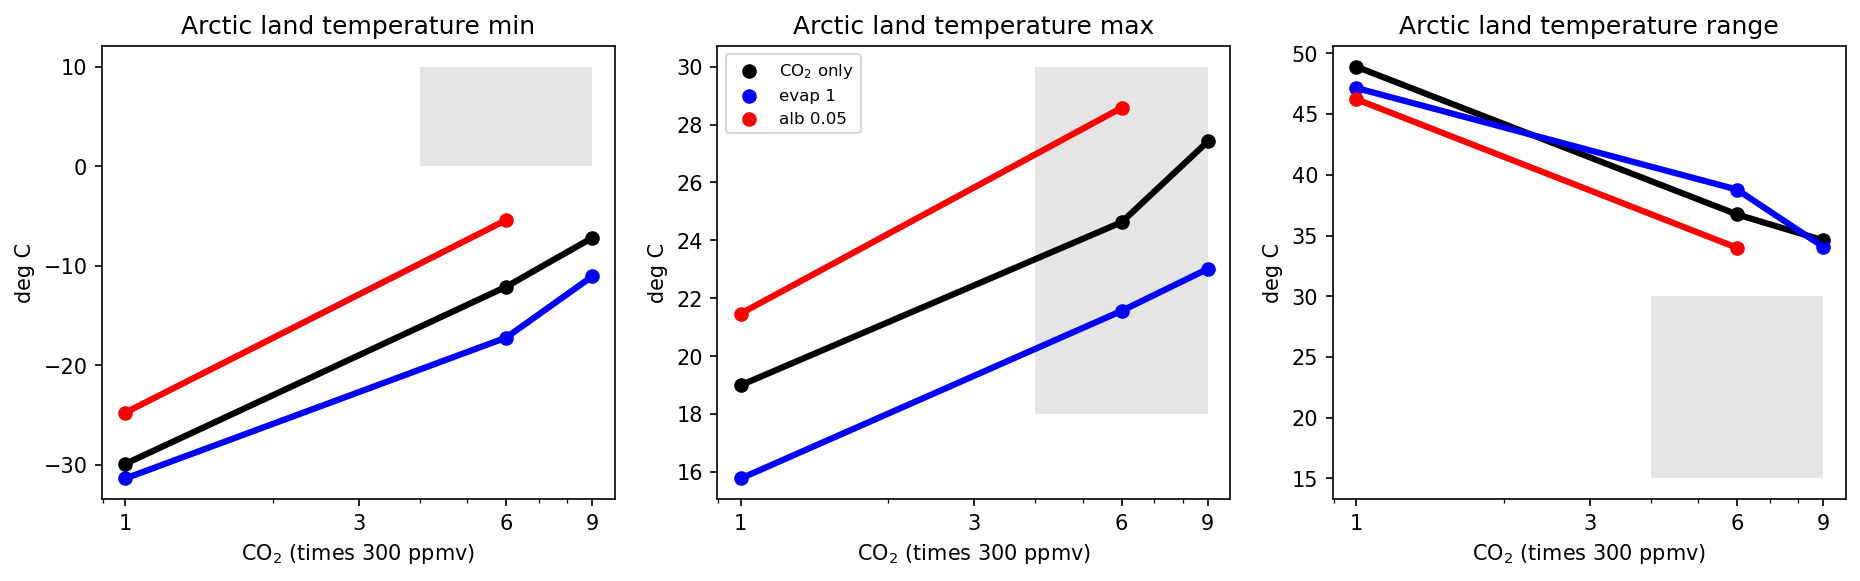

In [9]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(15, 4),dpi=150)

errorboxes = [Rectangle((4, 0), 5, 10)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax1 = plt.subplot(131)
ax1.add_collection(pc)
plt.plot([1,6,9],[t_min(ctl_300),t_min(ctl_1800),t_min(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_min(ctl_300),t_min(ctl_1800),t_min(ctl_2700)],c='k',label='CO$_2$ only')
#plt.plot([1,6,9],[t_min(flat_300),t_min(flat_1800),t_min(flat_2700)],c='g',lw=3)
#plt.scatter([1,6,9],[t_min(flat_300),t_min(flat_1800),t_min(flat_2700)],c='g',label='flat')
plt.plot([1,6,9],[t_min(evap1_300),t_min(evap1_1800),t_min(evap1_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_min(evap1_300),t_min(evap1_1800),t_min(evap1_2700)],c='b',label='evap 1')
plt.plot([1,6],[t_min(alb05_300),t_min(alb05_1800)],c='r',lw=3)
plt.scatter([1,6],[t_min(alb05_300),t_min(alb05_1800)],c='r',label='alb 0.05')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature min')
plt.xlim([0,10])
# plt.ylim([-40,10])
ax2 = plt.subplot(132)
errorboxes = [Rectangle((4, 18), 5, 12)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax2.add_collection(pc)
plt.plot([1,6,9],[t_max(ctl_300),t_max(ctl_1800),t_max(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_max(ctl_300),t_max(ctl_1800),t_max(ctl_2700)],c='k',label='CO$_2$ only')
#plt.plot([1,6,9],[t_max(flat_300),t_max(flat_1800),t_max(flat_2700)],c='g',lw=3)
#plt.scatter([1,6,9],[t_max(flat_300),t_max(flat_1800),t_max(flat_2700)],c='g',label='flat')
plt.plot([1,6,9],[t_max(evap1_300),t_max(evap1_1800),t_max(evap1_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_max(evap1_300),t_max(evap1_1800),t_max(evap1_2700)],c='b',label='evap 1')
plt.plot([1,6],[t_max(alb05_300),t_max(alb05_1800)],c='r',lw=3)
plt.scatter([1,6],[t_max(alb05_300),t_max(alb05_1800)],c='r',label='alb 0.05')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature max')
plt.xlim([0,10])
plt.legend()
# plt.ylim([-40,10])
plt.legend(fontsize=8,loc='upper left')
ax3 = plt.subplot(133)
errorboxes = [Rectangle((4, 15), 5, 15)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax3.add_collection(pc)
plt.plot([1,6,9],[t_range(ctl_300),t_range(ctl_1800),t_range(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_range(ctl_300),t_range(ctl_1800),t_range(ctl_2700)],c='k',label='CO$_2$ only')
#plt.plot([1,6,9],[t_range(flat_300),t_range(flat_1800),t_range(flat_2700)],c='g',lw=3)
#plt.scatter([1,6,9],[t_range(flat_300),t_range(flat_1800),t_range(flat_2700)],c='g',label='flat')
plt.plot([1,6,9],[t_range(evap1_300),t_range(evap1_1800),t_range(evap1_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_range(evap1_300),t_range(evap1_1800),t_range(evap1_2700)],c='b',label='evap 1')
plt.plot([1,6],[t_range(alb05_300),t_range(alb05_1800)],c='r',lw=3)
plt.scatter([1,6],[t_range(alb05_300),t_range(alb05_1800)],c='r',label='alb 0.05')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature range')
# plt.legend()
plt.xlim([0,10])
# plt.ylim([15,55])
plt.show()

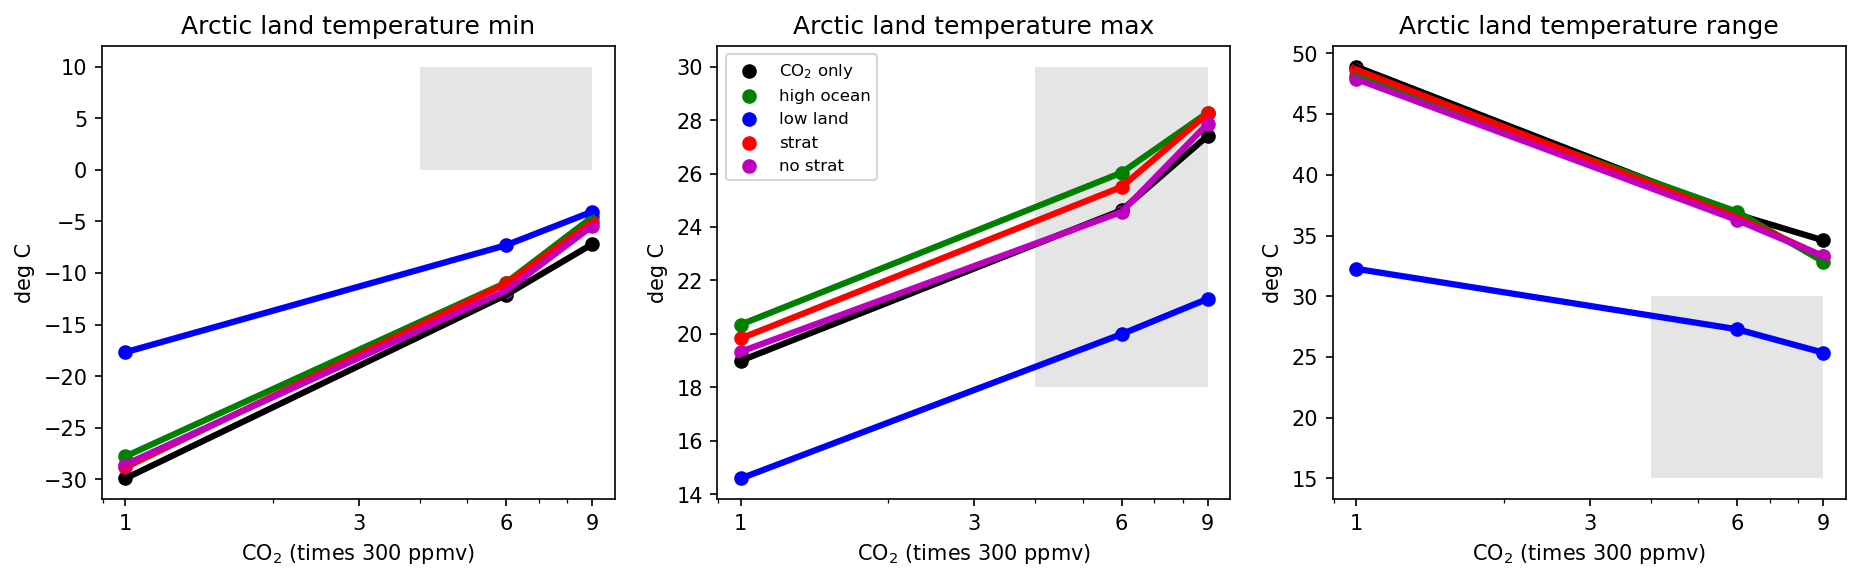

In [10]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(15, 4),dpi=150)

errorboxes = [Rectangle((4, 0), 5, 10)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax1 = plt.subplot(131)
ax1.add_collection(pc)
plt.plot([1,6,9],[t_min(ctl_300),t_min(ctl_1800),t_min(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_min(ctl_300),t_min(ctl_1800),t_min(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,6,9],[t_min(highocean_300),t_min(highocean_1800),t_min(highocean_2700)],c='g',lw=3)
plt.scatter([1,6,9],[t_min(highocean_300),t_min(highocean_1800),t_min(highocean_2700)],c='g',label='high ocean')
plt.plot([1,6,9],[t_min(lowland_300),t_min(lowland_1800),t_min(lowland_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_min(lowland_300),t_min(lowland_1800),t_min(lowland_2700)],c='b',label='low land')
plt.plot([1,6,9],[t_min(strat_300),t_min(strat_1800),t_min(strat_2700)],c='r',lw=3)
plt.scatter([1,6,9],[t_min(strat_300),t_min(strat_1800),t_min(strat_2700)],c='r',label='strat')
plt.plot([1,6,9],[t_min(nostrat_300),t_min(nostrat_1800),t_min(nostrat_2700)],c='m',lw=3)
plt.scatter([1,6,9],[t_min(nostrat_300),t_min(nostrat_1800),t_min(nostrat_2700)],c='m',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature min')
plt.xlim([0,10])
# plt.ylim([-40,10])
ax2 = plt.subplot(132)
errorboxes = [Rectangle((4, 18), 5, 12)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax2.add_collection(pc)
plt.plot([1,6,9],[t_max(ctl_300),t_max(ctl_1800),t_max(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_max(ctl_300),t_max(ctl_1800),t_max(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,6,9],[t_max(highocean_300),t_max(highocean_1800),t_max(highocean_2700)],c='g',lw=3)
plt.scatter([1,6,9],[t_max(highocean_300),t_max(highocean_1800),t_max(highocean_2700)],c='g',label='high ocean')
plt.plot([1,6,9],[t_max(lowland_300),t_max(lowland_1800),t_max(lowland_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_max(lowland_300),t_max(lowland_1800),t_max(lowland_2700)],c='b',label='low land')
plt.plot([1,6,9],[t_max(strat_300),t_max(strat_1800),t_max(strat_2700)],c='r',lw=3)
plt.scatter([1,6,9],[t_max(strat_300),t_max(strat_1800),t_max(strat_2700)],c='r',label='strat')
plt.plot([1,6,9],[t_max(nostrat_300),t_max(nostrat_1800),t_max(nostrat_2700)],c='m',lw=3)
plt.scatter([1,6,9],[t_max(nostrat_300),t_max(nostrat_1800),t_max(nostrat_2700)],c='m',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature max')
plt.xlim([0,10])
plt.legend()
# plt.ylim([-40,10])
plt.legend(fontsize=8,loc='upper left')
ax3 = plt.subplot(133)
errorboxes = [Rectangle((4, 15), 5, 15)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax3.add_collection(pc)
plt.plot([1,6,9],[t_range(ctl_300),t_range(ctl_1800),t_range(ctl_2700)],c='k',lw=3)
plt.scatter([1,6,9],[t_range(ctl_300),t_range(ctl_1800),t_range(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,6,9],[t_range(highocean_300),t_range(highocean_1800),t_range(highocean_2700)],c='g',lw=3)
plt.scatter([1,6,9],[t_range(highocean_300),t_range(highocean_1800),t_range(highocean_2700)],c='g',label='high ocean')
plt.plot([1,6,9],[t_range(lowland_300),t_range(lowland_1800),t_range(lowland_2700)],c='b',lw=3)
plt.scatter([1,6,9],[t_range(lowland_300),t_range(lowland_1800),t_range(lowland_2700)],c='b',label='low land')
plt.plot([1,6,9],[t_range(strat_300),t_range(strat_1800),t_range(strat_2700)],c='r',lw=3)
plt.scatter([1,6,9],[t_range(strat_300),t_range(strat_1800),t_range(strat_2700)],c='r',label='strat')
plt.plot([1,6,9],[t_range(nostrat_300),t_range(nostrat_1800),t_range(nostrat_2700)],c='m',lw=3)
plt.scatter([1,6,9],[t_range(nostrat_300),t_range(nostrat_1800),t_range(nostrat_2700)],c='m',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature range')
# plt.legend()
plt.xlim([0,10])
# plt.ylim([15,55])
plt.show()

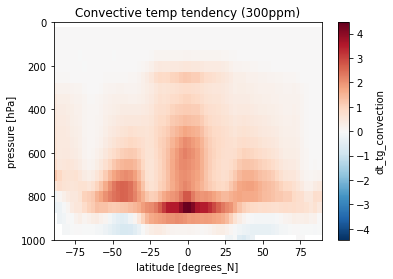

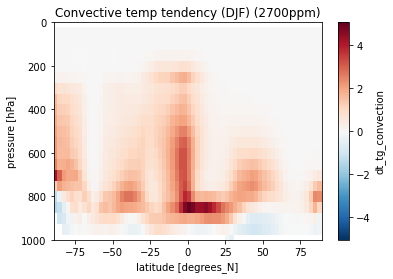

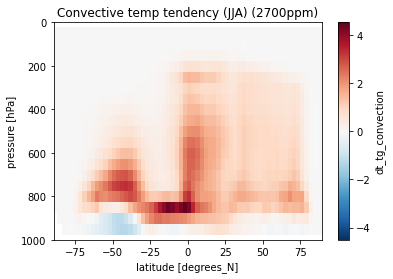

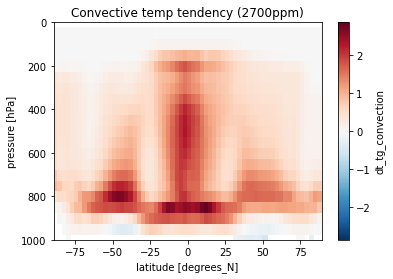

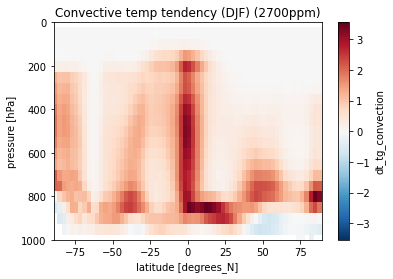

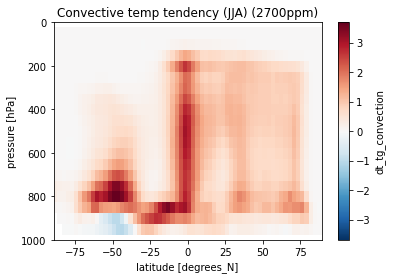

In [11]:
(ctl_300.dt_tg_convection*3600*24).mean(('months','lon')).plot()
plt.title('Convective temp tendency (300ppm)')
plt.ylim([1000,0])
plt.show()

(ctl_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean(('months','lon')).plot()
plt.title('Convective temp tendency (DJF) (2700ppm)')
plt.ylim([1000,0])
plt.show()

(ctl_300.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean(('months','lon')).plot()
plt.title('Convective temp tendency (JJA) (2700ppm)')
plt.ylim([1000,0])
plt.show()

(ctl_2700.dt_tg_convection*3600*24).mean(('months','lon')).plot()
plt.title('Convective temp tendency (2700ppm)')
plt.ylim([1000,0])
plt.show()
(ctl_2700.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean(('months','lon')).plot()
plt.title('Convective temp tendency (DJF) (2700ppm)')
plt.ylim([1000,0])
plt.show()

(ctl_2700.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean(('months','lon')).plot()
plt.title('Convective temp tendency (JJA) (2700ppm)')
plt.ylim([1000,0])
plt.show()

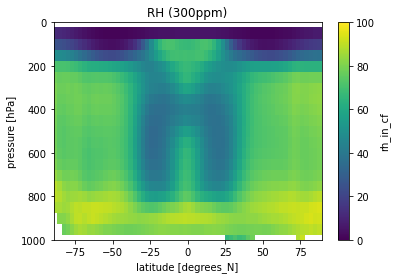

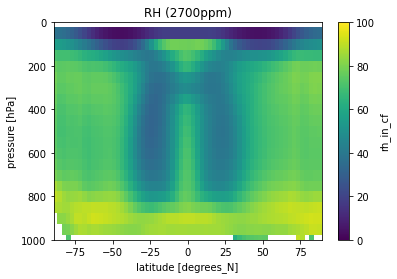

In [12]:
ctl_300.rh_in_cf.mean(('months','lon')).plot(vmin=0,vmax=100)
plt.title('RH (300ppm)')
plt.ylim([1000,0])
plt.show()
ctl_2700.rh_in_cf.mean(('months','lon')).plot(vmin=0,vmax=100)
plt.title('RH (2700ppm)')
plt.ylim([1000,0])
plt.show()

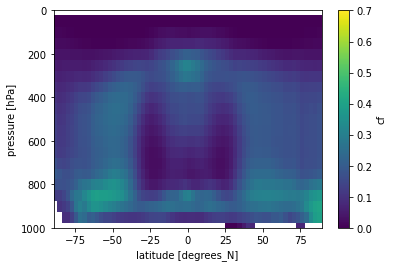

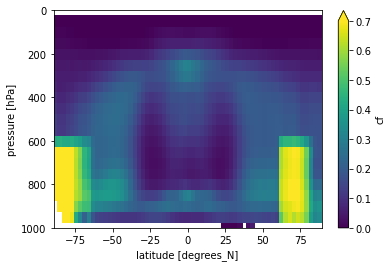

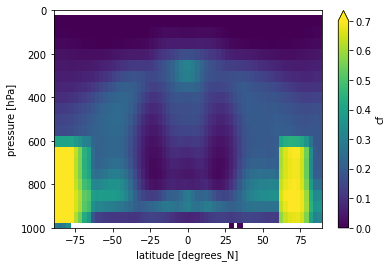

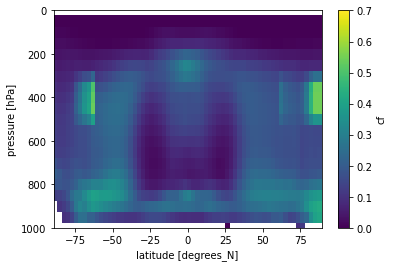

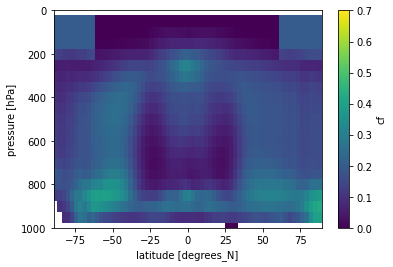

In [13]:
ctl_300.cf.mean(('months','lon')).plot(vmin=0,vmax=0.7)
plt.ylim([1000,0])
plt.show()
lowland_300.cf.mean(('months','lon')).plot(vmin=0,vmax=0.7)
plt.ylim([1000,0])
plt.show()
flat_300.cf.mean(('months','lon')).plot(vmin=0,vmax=0.7)
plt.ylim([1000,0])
plt.show()
highocean_300.cf.mean(('months','lon')).plot(vmin=0,vmax=0.7)
plt.ylim([1000,0])
plt.show()
strat_300.cf.mean(('months','lon')).plot(vmin=0,vmax=0.7)
plt.ylim([1000,0])
plt.show()

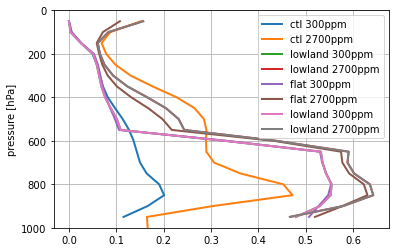

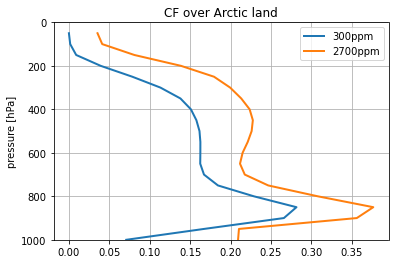

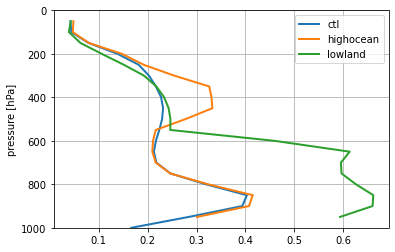

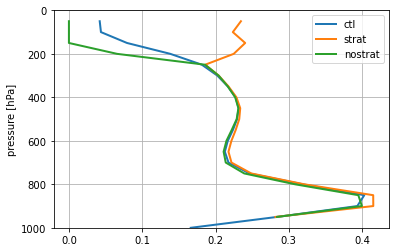

In [14]:
ctl_300.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='ctl 300ppm')
ctl_2700.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='ctl 2700ppm')
lowland_300.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='lowland 300ppm')
lowland_2700.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='lowland 2700ppm')
flat_300.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='flat 300ppm')
flat_2700.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='flat 2700ppm')
lowland_300.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='lowland 300ppm')
lowland_2700.cf.isel(months=[0,1,2]).mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='lowland 2700ppm')
plt.legend()
plt.ylim([1000,0])
plt.grid()
plt.show()

ctl_300.cf.mean(('months')).where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='300ppm')
ctl_2700.cf.mean(('months')).where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='2700ppm')
plt.legend()
plt.ylim([1000,0])
plt.grid()
plt.title('CF over Arctic land')
plt.show()

ctl_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='ctl')
highocean_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='highocean')
lowland_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='lowland')
plt.legend()
plt.ylim([1000,0])
plt.grid()
plt.show()

ctl_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='ctl')
strat_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='strat')
nostrat_2700.cf.mean(('months','lon')).where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='nostrat')
plt.legend()
plt.ylim([1000,0])
plt.grid()
plt.show()

In [15]:
CRF_vals=[(ctl_300.soc_olr_clr-ctl_300.soc_olr+ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (ctl_1800.soc_olr_clr-ctl_1800.soc_olr+ctl_1800.soc_toa_sw-ctl_1800.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (ctl_2700.soc_olr_clr-ctl_2700.soc_olr+ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (lowland_300.soc_olr_clr-lowland_300.soc_olr+lowland_300.soc_toa_sw-lowland_300.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (lowland_1800.soc_olr_clr-lowland_1800.soc_olr+lowland_1800.soc_toa_sw-lowland_1800.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (lowland_2700.soc_olr_clr-lowland_2700.soc_olr+lowland_2700.soc_toa_sw-lowland_2700.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_300.soc_olr_clr-flat_300.soc_olr+flat_300.soc_toa_sw-flat_300.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_1800.soc_olr_clr-flat_1800.soc_olr+flat_1800.soc_toa_sw-flat_1800.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_2700.soc_olr_clr-flat_2700.soc_olr+flat_2700.soc_toa_sw-flat_2700.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_300.soc_olr_clr-evap1_300.soc_olr+evap1_300.soc_toa_sw-evap1_300.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_1800.soc_olr_clr-evap1_1800.soc_olr+evap1_1800.soc_toa_sw-evap1_1800.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_2700.soc_olr_clr-evap1_2700.soc_olr+evap1_2700.soc_toa_sw-evap1_2700.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (alb05_300.soc_olr_clr-alb05_300.soc_olr+alb05_300.soc_toa_sw-alb05_300.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (alb05_1800.soc_olr_clr-alb05_1800.soc_olr+alb05_1800.soc_toa_sw-alb05_1800.soc_toa_sw_clr).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         ]

In [16]:
Ts_vals=[(ctl_300.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (ctl_1800.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (ctl_2700.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
          (lowland_300.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (lowland_1800.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (lowland_2700.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_300.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_1800.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (flat_2700.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_300.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_1800.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (evap1_2700.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (alb05_300.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         (alb05_1800.t_surf-273).where(ctl_300.lat>60).weighted(weights).mean(('lat','lon')).isel(months=[0,1,2]).mean('months').values,
         ]

Text(0, 0.5, 'Cloud Radiative Forcing (W/m$^2$)')

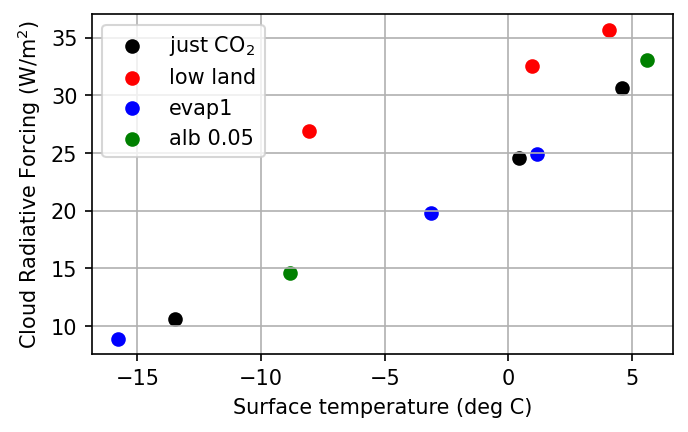

In [17]:
plt.figure(figsize=(5,3),dpi=150)
plt.scatter(Ts_vals[0:3],CRF_vals[0:3],c='k',label='just CO$_2$')
plt.scatter(Ts_vals[3:6],CRF_vals[3:6],c='r',label='low land')
# plt.scatter(Ts_vals[6:9],CRF_vals[6:9],c='m',label='flat')
plt.scatter(Ts_vals[9:12],CRF_vals[9:12],c='b',label='evap1')
plt.scatter(Ts_vals[12:14],CRF_vals[12:14],c='g',label='alb 0.05')
plt.grid()
plt.legend()
plt.xlabel('Surface temperature (deg C)')
plt.ylabel('Cloud Radiative Forcing (W/m$^2$)')

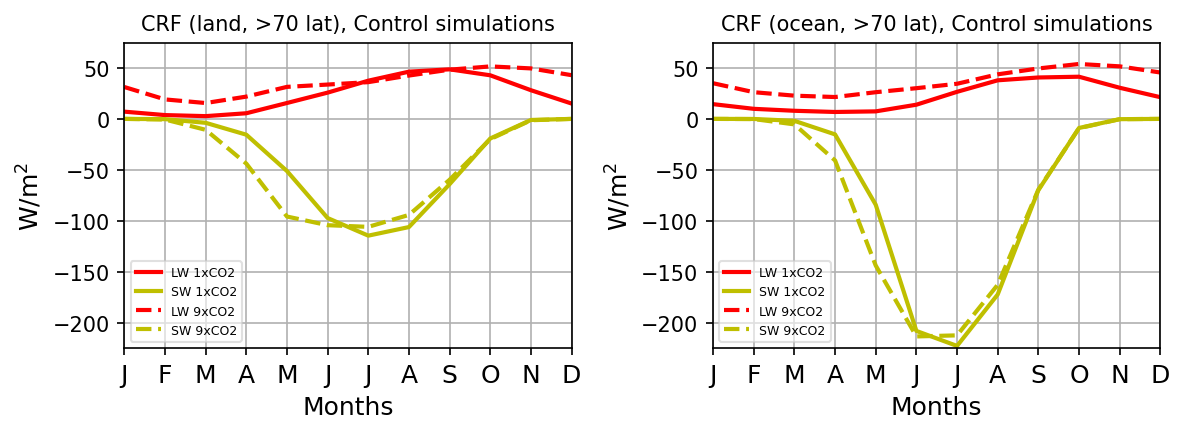

In [18]:
plt.figure(figsize=(8,3),dpi=150)
plt.subplot(121)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Control simulations',fontsize=10)
plt.subplot(122)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.tight_layout()
plt.title('CRF (ocean, >70 lat), Control simulations',fontsize=10)
plt.show()

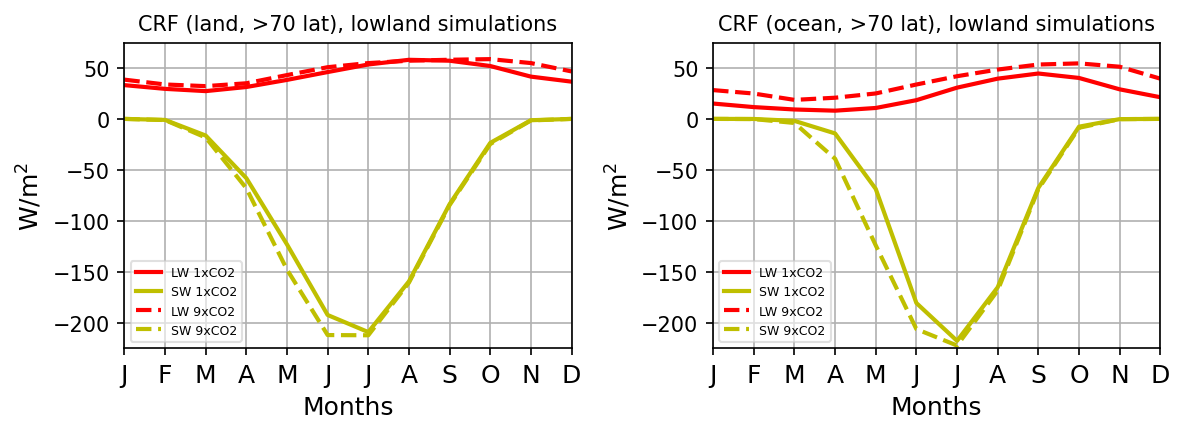

In [19]:
plt.figure(figsize=(8,3),dpi=150)
plt.subplot(121)
(lowland_300.soc_olr_clr-lowland_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(lowland_300.soc_toa_sw-lowland_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(lowland_2700.soc_olr_clr-lowland_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(lowland_2700.soc_toa_sw-lowland_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), lowland simulations',fontsize=10)
plt.subplot(122)
(lowland_300.soc_olr_clr-lowland_300.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(lowland_300.soc_toa_sw-lowland_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(lowland_2700.soc_olr_clr-lowland_2700.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(lowland_2700.soc_toa_sw-lowland_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.tight_layout()
plt.title('CRF (ocean, >70 lat), lowland simulations',fontsize=10)
plt.show()

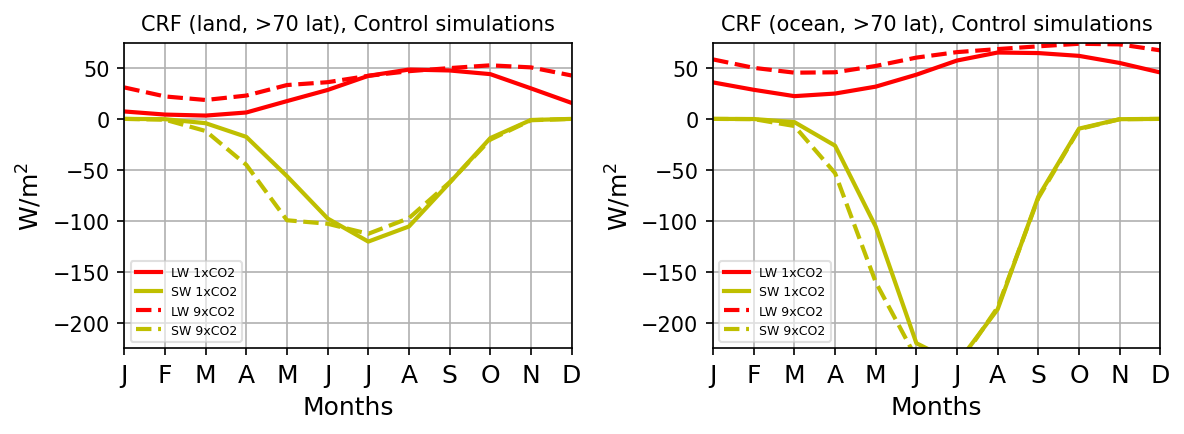

In [22]:
plt.figure(figsize=(8,3),dpi=150)
plt.subplot(121)
(highocean_300.soc_olr_clr-highocean_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(highocean_300.soc_toa_sw-highocean_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(highocean_2700.soc_olr_clr-highocean_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(highocean_2700.soc_toa_sw-highocean_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Control simulations',fontsize=10)
plt.subplot(122)
(highocean_300.soc_olr_clr-highocean_300.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(highocean_300.soc_toa_sw-highocean_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(highocean_2700.soc_olr_clr-highocean_2700.soc_olr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 9xCO2',ls='--')
(highocean_2700.soc_toa_sw-highocean_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(ocean).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 9xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.tight_layout()
plt.title('CRF (ocean, >70 lat), Control simulations',fontsize=10)
plt.show()

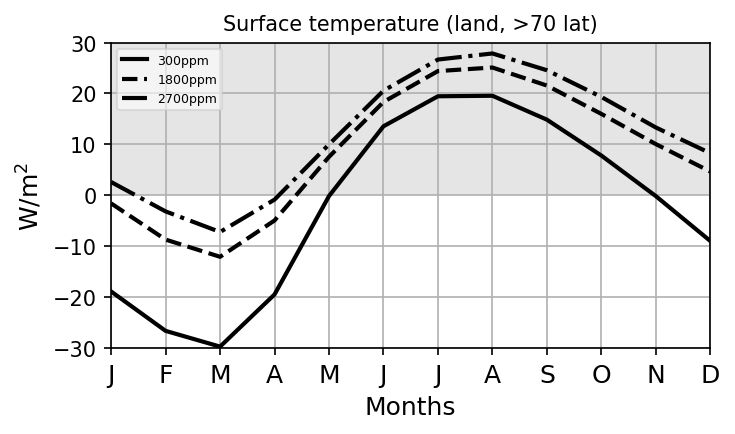

In [23]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,3),dpi=150)
ax = plt.subplot(111)
errorboxes = [Rectangle((0, 0), 12, 30)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax.add_collection(pc)
(ctl_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',label='300ppm')
(ctl_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',ls='--',label='1800ppm')
(ctl_2700.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',ls='-.',label='2700ppm')
# (flat_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='g',label='flat 300ppm')
# (flat_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='g',ls='--',label='flat 1800ppm')
# (evap1_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='b',label='evap 300ppm')
# (evap1_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='b',ls='--',label='evap 1800ppm')
# (alb05_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='alb 0.5 300ppm')
# (alb05_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',ls='--',label='alb 0.5 1800ppm')
plt.xlim([1,12])
plt.ylim([-30,30])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('Surface temperature (land, >70 lat)',fontsize=10)
plt.tight_layout()
plt.show()

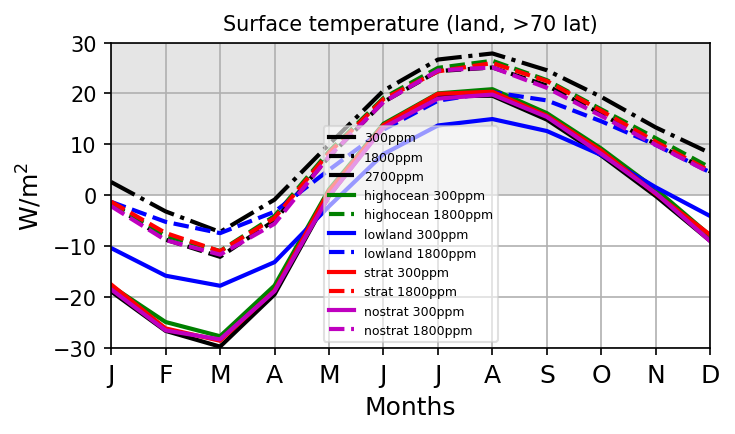

In [12]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,3),dpi=150)
ax = plt.subplot(111)
errorboxes = [Rectangle((0, 0), 12, 30)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax.add_collection(pc)
(ctl_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',label='300ppm')
(ctl_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',ls='--',label='1800ppm')
(ctl_2700.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='k',ls='-.',label='2700ppm')
(highocean_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='g',label='highocean 300ppm')
(highocean_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='g',ls='--',label='highocean 1800ppm')
(lowland_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='b',label='lowland 300ppm')
(lowland_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='b',ls='--',label='lowland 1800ppm')
(strat_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='strat 300ppm')
(strat_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',ls='--',label='strat 1800ppm')
(nostrat_300.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='m',label='nostrat 300ppm')
(nostrat_1800.t_surf-273).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='m',ls='--',label='nostrat 1800ppm')
plt.xlim([1,12])
plt.ylim([-30,30])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('Surface temperature (land, >70 lat)',fontsize=10)
plt.tight_layout()
plt.show()

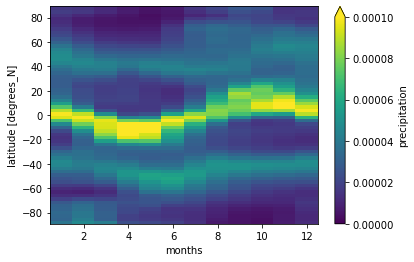

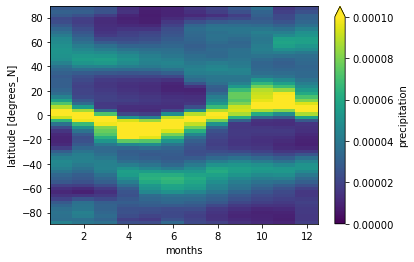

In [12]:
ctl_300.precipitation.mean('lon').plot(y='lat',vmin=0,vmax=1e-4)
plt.show()
ctl_1800.precipitation.mean('lon').plot(y='lat',vmin=0,vmax=1e-4)
plt.show()

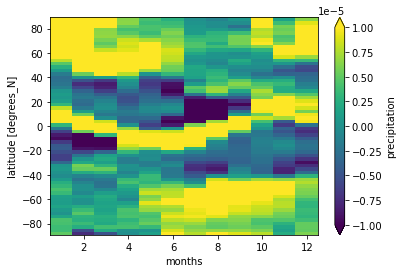

In [13]:
(ctl_1800.precipitation.mean('lon')-ctl_300.precipitation.mean('lon')).plot(y='lat',vmin=-1e-5,vmax=1e-5)
plt.show()

In [5]:
t42 = xr.open_mfdataset('/scratch/mh920/data_isca/eocene_T42_GA7_300ppm_alb0075_landalb2_evap05_freezedry/run*/atmos_monthly.nc')
t21 = xr.open_mfdataset('/scratch/mh920/data_isca/eocene_T21_GA7_300ppm_alb0075_landalb2_evap05_freezedry/run*/atmos_monthly.nc')

fig = plt.figure(figsize=(5,4),dpi=150)
(t21.soc_toa_sw-t21.soc_toa_sw_clr).mean(('lon')).weighted(weightst21).mean('lat').plot(label='T21 SW')
(t21.soc_olr_clr-t21.soc_olr).mean(('lon')).weighted(weightst21).mean('lat').plot(label='T21 LW')
(t42.soc_toa_sw-t42.soc_toa_sw_clr).mean(('lon')).weighted(weights).mean('lat').plot(label='T42 SW')
(t42.soc_olr_clr-t42.soc_olr).mean(('lon')).weighted(weights).mean('lat').plot(label='T42 LW')
plt.grid()
plt.title('Radiative effect of clouds')
plt.ylabel('W/m2')
plt.legend()
plt.show()

fig = plt.figure(figsize=(5,4),dpi=150)
t42.t_surf.mean(('lon')).weighted(weights).mean('lat').plot(label='T42')
weightst21 = np.cos(np.deg2rad(t21.lat))
weightst21.name = "weights"
t21.t_surf.mean(('lon')).weighted(weightst21).mean('lat').plot(label='T21')
# plt.xticks(np.linspace(0,10,11))
plt.grid()
plt.title('Global-mean surface temperature')
plt.ylabel('K')
plt.legend()
plt.show()

fig = plt.figure(figsize=(5,4),dpi=150)
(t42.t_surf-273).mean(('time','lon')).plot(label='T42')
(t21.t_surf-273).mean(('time','lon')).plot(label='T21')
plt.ylim([-5,70])
plt.xticks(np.linspace(-90,90,13))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (Eocene BC, same month)')
plt.legend()
plt.grid()
plt.show()

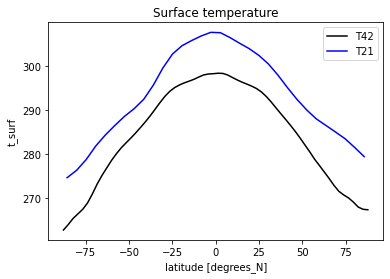

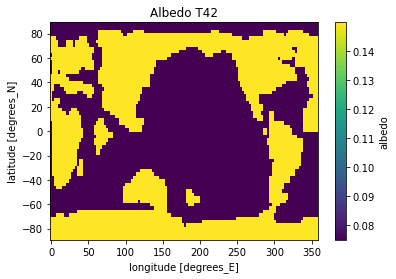

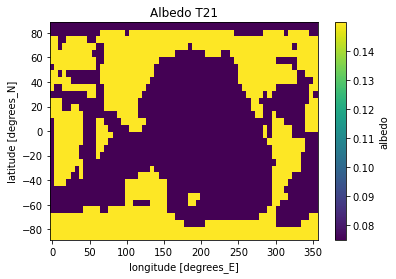

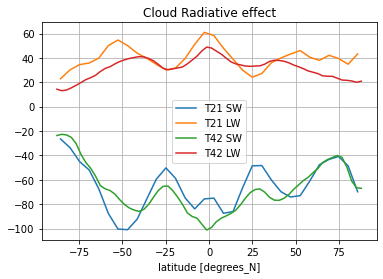

T21 SW CRE -69.51455822413249
T21 LW CRE 41.073059452586115
T42 SW CRE -74.74699340739701
T42 LW CRE 35.34542809868607


In [4]:
ctl_300.t_surf.mean(('months','lon')).plot(c='k',label='T42')
ctl_300_t21.t_surf.mean(('months','lon')).plot(c='b',label='T21')
plt.legend()
plt.title('Surface temperature')
plt.show()
ctl_300.albedo.mean(('months')).plot()
plt.title('Albedo T42')
plt.show()
ctl_300_t21.albedo.mean(('months')).plot()
plt.title('Albedo T21')
plt.show()
(ctl_300_t21.soc_toa_sw-ctl_300_t21.soc_toa_sw_clr).mean(('lon','months')).plot(label='T21 SW')
(ctl_300_t21.soc_olr_clr-ctl_300_t21.soc_olr).mean(('lon','months')).plot(label='T21 LW')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).mean(('lon','months')).plot(label='T42 SW')
(ctl_300.soc_olr_clr-ctl_300.soc_olr).mean(('lon','months')).plot(label='T42 LW')
plt.legend()
plt.grid()
plt.title('Cloud Radiative effect')
plt.show()

print('T21 SW CRE', (ctl_300_t21.soc_toa_sw-ctl_300_t21.soc_toa_sw_clr).mean(('lon','months')).weighted(weightst21).mean('lat').values)
print('T21 LW CRE', (ctl_300_t21.soc_olr_clr-ctl_300_t21.soc_olr).mean(('lon','months')).weighted(weightst21).mean('lat').values)
print('T42 SW CRE', (ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).mean(('lon','months')).weighted(weights).mean('lat').values)
print('T42 LW CRE', (ctl_300.soc_olr_clr-ctl_300.soc_olr).mean(('lon','months')).weighted(weights).mean('lat').values)

In [14]:
ctl_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_ref_hc01_mean.nc')
highocean_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_highoceanclouds_hc01_mean.nc')
lowland_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_lowlandclouds_hc01_mean.nc')
nostrat_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_nostratclouds_hc01_mean.nc')
strat_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_stratclouds_hc01_mean.nc')
ctl_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_ref_hc01_mean.nc')
highocean_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_highoceanclouds_hc01_mean.nc')
lowland_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_lowlandclouds_hc01_mean.nc')
nostrat_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_nostratclouds_hc01_mean.nc')
strat_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_stratclouds_hc01_mean.nc')
ctl_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_ref_hc01_mean.nc')
highocean_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_highoceanclouds_hc01_mean.nc')
lowland_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_lowlandclouds_hc01_mean.nc')
nostrat_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_nostratclouds_hc01_mean.nc')
strat_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_stratclouds_hc01_mean.nc')
ctl_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_ref_hc01_mean.nc')
highocean_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_highoceanclouds_hc01_mean.nc')
lowland_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_lowlandclouds_hc01_mean.nc')
nostrat_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_nostratclouds_hc01_mean.nc')
strat_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_stratclouds_hc01_mean.nc')

evap01_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_evap01_mean.nc')
evap01_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_evap01_mean.nc')
evap01_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_evap01_mean.nc')
evap01_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_evap01_mean.nc')
evap03_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_evap03_mean.nc')
evap03_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_evap03_mean.nc')
evap03_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_evap03_mean.nc')
evap03_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_evap03_mean.nc')
evap07_300 = xr.open_dataset('./../data_isca/eocene_T21_GA7_300ppm_evap07_mean.nc')
evap07_900 = xr.open_dataset('./../data_isca/eocene_T21_GA7_900ppm_evap07_mean.nc')
evap07_1800 = xr.open_dataset('./../data_isca/eocene_T21_GA7_1800ppm_evap07_mean.nc')
evap07_2700 = xr.open_dataset('./../data_isca/eocene_T21_GA7_2700ppm_evap07_mean.nc')

weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"
land=ctl_300.ml_heat_cap.mean('months') < 8257740
ocean=ctl_300.ml_heat_cap.mean('months') > 8257740

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/mh920/data_isca/eocene_T21_GA7_300ppm_ref_hc01_mean.nc'

In [ ]:
ctl_300.albedo.mean('months').plot()

In [ ]:
land.plot()

In [ ]:
(ctl_300.precipitation.isel(months=[5,6,7,8,9]).sum('months')/ctl_300.precipitation.sum('months')*100).plot(vmin=0,vmax=100)

In [ ]:
(ctl_300.precipitation.isel(months=[10,11,0,1,2]).sum('months')/ctl_300.precipitation.sum('months')*100).plot(vmin=0,vmax=100)

In [8]:
def t_mean(obj):
    return obj.t_surf.mean(('months','lon')).weighted(weights).mean('lat')-273
def t_grad(obj):
    return obj.t_surf.mean(('months','lon')).where(obj.lat<30).where(obj.lat>-30).weighted(weights).mean('lat')-obj.t_surf.mean(('months','lon')).where(obj.lat>60).weighted(weights).mean('lat')
def t_max(obj):
    return obj.t_surf.where(land).where(obj.lat>70).mean(('lon')).weighted(weights).mean('lat').max()-273
def t_min(obj):
    return obj.t_surf.where(land).where(obj.lat>70).mean(('lon')).weighted(weights).mean('lat').min()-273
def t_range(obj):
    return t_max(obj)-t_min(obj)

In [9]:
def plot(obj_list,label_list,col_list,ylim1,ylim2):
    plt.figure(figsize=(8,3),dpi=150)
    plt.subplot(121)
    for l, n, c in zip(obj_list,label_list,col_list):
        (l.t_surf-273).where(land).mean(('lon','months')).plot(lw=2,c=c,label=n+' land')
        (l.t_surf-273).where(ocean).mean(('lon','months')).plot(lw=2,ls='--',c=c,label=n+' ocean')
    plt.xlim([-90,90])
    plt.ylim(ylim1)
    plt.xticks(np.linspace(-90,90,7),fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Latitude (deg N)',fontsize=12)
    plt.ylabel('deg C',fontsize=12)
    plt.title('(a) Annual-mean surface temperature',fontsize=12)
    plt.legend(loc='best',fontsize=6, framealpha=0.6)
    plt.grid()
    plt.subplot(122)
    for l, n, c in zip(obj_list,label_list,col_list):
        (l.t_surf-273).where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=2,c=c,label=n+' land')
        (l.t_surf-273).where(ctl.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=2,c=c,ls='--',label=n+' ocean')
    plt.xlim([1,12])
    plt.ylim(ylim2)
    plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Months',fontsize=12)
    plt.ylabel('deg C',fontsize=12)
    plt.title('(b) Surface temperature (latitude>70)',fontsize=12)
    plt.legend(loc='best',fontsize=6, framealpha=0.6)
    plt.grid()
    plt.tight_layout()
    plt.show()

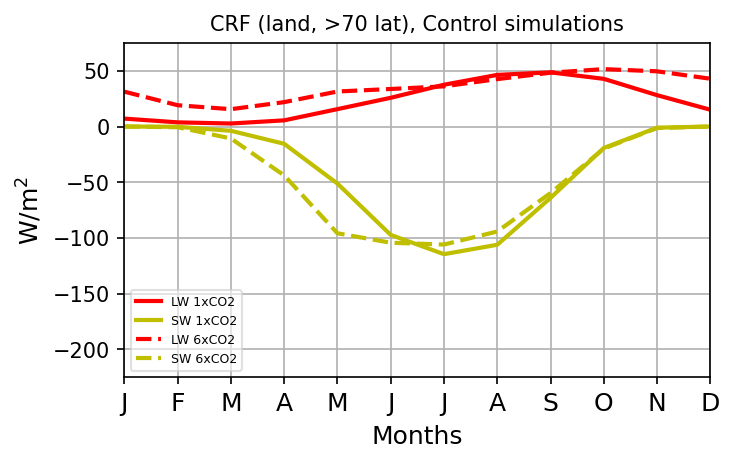

NameError: name 'evap01_300' is not defined

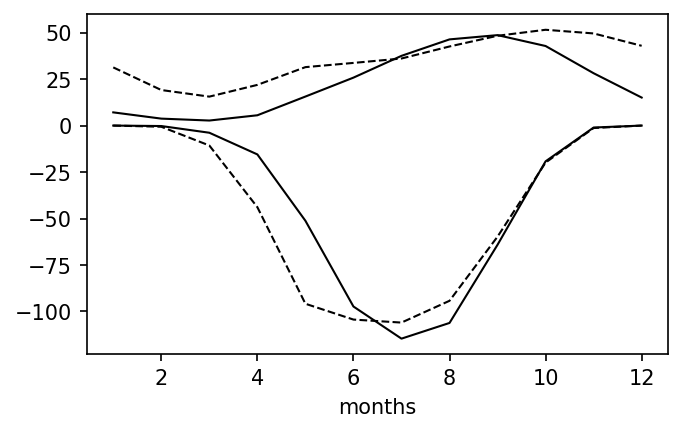

In [10]:
plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.tight_layout()
plt.title('CRF (land, >70 lat), Control simulations',fontsize=10)
plt.show()

plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(evap01_300.soc_olr_clr-evap01_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(evap01_300.soc_toa_sw-evap01_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(evap01_2700.soc_olr_clr-evap01_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(evap01_2700.soc_toa_sw-evap01_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Land evaporative resistance = 0.1',fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(evap03_300.soc_olr_clr-evap03_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(evap03_300.soc_toa_sw-evap03_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(evap03_2700.soc_olr_clr-evap03_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(evap03_2700.soc_toa_sw-evap03_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Land evaporative resistance = 0.3',fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(evap07_300.soc_olr_clr-evap07_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(evap07_300.soc_toa_sw-evap07_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(evap07_2700.soc_olr_clr-evap07_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(evap07_2700.soc_toa_sw-evap07_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Land evaporative resistance = 0.7',fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(highocean_300.soc_olr_clr-highocean_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(highocean_300.soc_toa_sw-highocean_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(highocean_2700.soc_olr_clr-highocean_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(highocean_2700.soc_toa_sw-highocean_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), High Ocean Clouds',fontsize=10)
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(lowland_300.soc_olr_clr-lowland_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(lowland_300.soc_toa_sw-lowland_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(lowland_2700.soc_olr_clr-lowland_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(lowland_2700.soc_toa_sw-lowland_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Low Land Clouds',fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(strat_300.soc_olr_clr-strat_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(strat_300.soc_toa_sw-strat_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(strat_2700.soc_olr_clr-strat_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(strat_2700.soc_toa_sw-strat_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), Stratospheric Clouds',fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,3),dpi=150)
(ctl_300.soc_olr_clr-ctl_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_300.soc_toa_sw-ctl_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k')
(ctl_2700.soc_olr_clr-ctl_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(ctl_2700.soc_toa_sw-ctl_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=1,c='k',ls='--')
(nostrat_300.soc_olr_clr-nostrat_300.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 1xCO2')
(nostrat_300.soc_toa_sw-nostrat_300.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 1xCO2')
(nostrat_2700.soc_olr_clr-nostrat_2700.soc_olr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='r',label='LW 6xCO2',ls='--')
(nostrat_2700.soc_toa_sw-nostrat_2700.soc_toa_sw_clr).where(ctl_300.lat>70).where(land).weighted(weights).mean(('lat','lon')).roll(months=-1,roll_coords=False).plot(lw=2,c='y',label='SW 6xCO2',ls='--')
plt.xlim([1,12])
plt.ylim([-225,75])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
# plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('W/m$^2$',fontsize=12)
plt.title('CRF',fontsize=12)
plt.legend(loc='best',fontsize=6, framealpha=0.6)
plt.grid()
plt.title('CRF (land, >70 lat), No Stratospheric Clouds',fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, Control simulations')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
highocean_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
highocean_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, high ocean clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
lowland_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
lowland_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, low land clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
strat_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
strat_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, stratospheric clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
nostrat_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
nostrat_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, no stratospheric clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap01_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap01_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, Land evap resistance = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap03_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap03_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, Land evap resistance = 0.3')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap07_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap07_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction, Land evap resistance = 0.7')
plt.grid()
plt.legend(fontsize=9)
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)

(ctl_300.t_surf-273).mean(('months','lon')).plot(c='k',label='ctl 1x',lw=1)
(ctl_2700.t_surf-273).mean(('months','lon')).plot(c='k',label='ctl 6x',ls='--',lw=1)
(evap01_300.t_surf-273).mean(('months','lon')).plot(c='b',label='evap01 1x',lw=1)
(evap01_2700.t_surf-273).mean(('months','lon')).plot(c='b',label='evap01 6x',ls='--',lw=1)
(evap03_300.t_surf-273).mean(('months','lon')).plot(c='r',label='evap03 1x',lw=1)
(evap03_2700.t_surf-273).mean(('months','lon')).plot(c='r',label='evap03 6x',ls='--',lw=1)
(evap07_300.t_surf-273).mean(('months','lon')).plot(c='g',label='evap07 1x',lw=1)
(evap07_2700.t_surf-273).mean(('months','lon')).plot(c='g',label='evap07 6x',ls='--',lw=1)
# plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,13))
# plt.yticks(np.linspace(-10,50,7))
plt.xlim([-90,90])
plt.xlabel('Latitude (deg N)')
plt.ylabel('deg C')
plt.title('Surface temperature (restricted land evaporation)')
plt.grid()
plt.legend(fontsize=9)
plt.show()


# ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
# ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
# evap03_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
# evap03_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
# plt.ylim([1000,0])
# plt.xlim([0,0.8])
# plt.xlabel('Cloud fraction')
# plt.title('Cloud fraction, Land evap resistance = 0.3')
# plt.grid()
# plt.legend(fontsize=9)
# plt.show()

# plt.figure(figsize=(5,4),dpi=150)
# ctl_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
# ctl_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
# evap07_300.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
# evap07_2700.cf.mean('months').mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
# plt.ylim([1000,0])
# plt.xlim([0,0.8])
# plt.xlabel('Cloud fraction')
# plt.title('Cloud fraction, Land evap resistance = 0.7')
# plt.grid()
# plt.legend(fontsize=9)
# plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), Control simulations')
plt.grid()
plt.legend(fontsize=9)
plt.show()


plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
highocean_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
highocean_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), high ocean clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
lowland_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
lowland_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), low land clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
strat_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
strat_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), stratospheric clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
nostrat_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
nostrat_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), no stratospheric clouds')
plt.grid()
plt.legend(fontsize=9)
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap01_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap01_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), Land evap res = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap03_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap03_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), Land evap res = 0.3')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
ctl_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
ctl_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
evap07_300.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
evap07_2700.cf.isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.xlim([0,0.8])
plt.xlabel('Cloud fraction')
plt.title('Cloud fraction (land, DJF), Land evap res = 0.7')
plt.grid()
plt.legend(fontsize=9)
plt.show()

In [ ]:
plt.figure(figsize=(5,4),dpi=150)
(ctl_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
(ctl_2700.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
(evap_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
(evap_2700.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
# plt.xlim([70,100])
plt.xlabel('K/day')
plt.title('Convective temp tend (land, DJF), Land evap resistance = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
(ctl_300.dt_tg_convection*3600*24).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
(ctl_2700.dt_tg_convection*3600*24).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
(evap_300.dt_tg_convection*3600*24).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
(evap_2700.dt_tg_convection*3600*24).mean('months').where(land).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
# plt.xlim([70,100])
plt.xlabel('K/day')
plt.title('Convective temp tend (land), Land evap resistance = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
(ctl_300.dt_tg_convection*3600*24).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
(ctl_2700.dt_tg_convection*3600*24).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
(evap_300.dt_tg_convection*3600*24).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
(evap_2700.dt_tg_convection*3600*24).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
# plt.xlim([70,100])
plt.xlabel('K/day')
plt.title('Convective temp tend (ocean), Land evap resistance = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

plt.figure(figsize=(5,4),dpi=150)
(ctl_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',lw=1)
(ctl_2700.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='grey',ls='--',lw=1)
(evap_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',lw=2,label='300ppm')
(evap_2700.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).mean('lon').where(ctl_300.lat>70).weighted(weights).mean('lat').plot(y='pfull',c='k',ls='--',lw=2,label='2700ppm')
plt.ylim([1000,0])
# plt.xlim([70,100])
plt.xlabel('K/day')
plt.title('Convective temp tend (ocean, DJF), Land evap resistance = 0.1')
plt.grid()
plt.legend(fontsize=9)
plt.show()

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(15, 4),dpi=150)

errorboxes = [Rectangle((4, 0), 5, 10)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax1 = plt.subplot(131)
ax1.add_collection(pc)
plt.plot([1,3,6,9],[t_min(ctl_300),t_min(ctl_900),t_min(ctl_1800),t_min(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_min(ctl_300),t_min(ctl_900),t_min(ctl_1800),t_min(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_min(highocean_300),t_min(highocean_900),t_min(highocean_1800),t_min(highocean_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_min(highocean_300),t_min(highocean_900),t_min(highocean_1800),t_min(highocean_2700)],c='m',label='high ocean')
plt.plot([1,3,6,9],[t_min(lowland_300),t_min(lowland_900),t_min(lowland_1800),t_min(lowland_2700)],c='orange',lw=3)
plt.scatter([1,3,6,9],[t_min(lowland_300),t_min(lowland_900),t_min(lowland_1800),t_min(lowland_2700)],c='orange',label='low land')
plt.plot([1,3,6,9],[t_min(strat_300),t_min(strat_900),t_min(strat_1800),t_min(strat_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_min(strat_300),t_min(strat_900),t_min(strat_1800),t_min(strat_2700)],c='g',label='strat')
plt.plot([1,3,6,9],[t_min(nostrat_300),t_min(nostrat_900),t_min(nostrat_1800),t_min(nostrat_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_min(nostrat_300),t_min(nostrat_900),t_min(nostrat_1800),t_min(nostrat_2700)],c='r',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature min')
plt.xlim([0,10])
# plt.ylim([-40,10])
ax2 = plt.subplot(132)
errorboxes = [Rectangle((4, 18), 5, 12)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax2.add_collection(pc)
plt.plot([1,3,6,9],[t_max(ctl_300),t_max(ctl_900),t_max(ctl_1800),t_max(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_max(ctl_300),t_max(ctl_900),t_max(ctl_1800),t_max(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_max(highocean_300),t_max(highocean_900),t_max(highocean_1800),t_max(highocean_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_max(highocean_300),t_max(highocean_900),t_max(highocean_1800),t_max(highocean_2700)],c='m',label='high ocean')
plt.plot([1,3,6,9],[t_max(lowland_300),t_max(lowland_900),t_max(lowland_1800),t_max(lowland_2700)],c='orange',lw=3)
plt.scatter([1,3,6,9],[t_max(lowland_300),t_max(lowland_900),t_max(lowland_1800),t_max(lowland_2700)],c='orange',label='low land')
plt.plot([1,3,6,9],[t_max(strat_300),t_max(strat_900),t_max(strat_1800),t_max(strat_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_max(strat_300),t_max(strat_900),t_max(strat_1800),t_max(strat_2700)],c='g',label='strat')
plt.plot([1,3,6,9],[t_max(nostrat_300),t_max(nostrat_900),t_max(nostrat_1800),t_max(nostrat_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_max(nostrat_300),t_max(nostrat_900),t_max(nostrat_1800),t_max(nostrat_2700)],c='r',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature max')
plt.xlim([0,10])
plt.legend()
# plt.ylim([-40,10])
plt.legend(fontsize=8,loc='upper left')
ax3 = plt.subplot(133)
errorboxes = [Rectangle((4, 15), 5, 15)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax3.add_collection(pc)
plt.plot([1,3,6,9],[t_range(ctl_300),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_range(ctl_300),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_range(highocean_300),t_range(highocean_900),t_range(highocean_1800),t_range(highocean_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_range(highocean_300),t_range(highocean_900),t_range(highocean_1800),t_range(highocean_2700)],c='m',label='high ocean')
plt.plot([1,3,6,9],[t_range(lowland_300),t_range(lowland_900),t_range(lowland_1800),t_range(lowland_2700)],c='orange',lw=3)
plt.scatter([1,3,6,9],[t_range(lowland_300),t_range(lowland_900),t_range(lowland_1800),t_range(lowland_2700)],c='orange',label='low land')
plt.plot([1,3,6,9],[t_range(strat_300),t_range(strat_900),t_range(strat_1800),t_range(strat_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_range(strat_300),t_range(strat_900),t_range(strat_1800),t_range(strat_2700)],c='g',label='strat')
plt.plot([1,3,6,9],[t_range(nostrat_300),t_range(nostrat_900),t_range(nostrat_1800),t_range(nostrat_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_range(nostrat_300),t_range(nostrat_900),t_range(nostrat_1800),t_range(nostrat_2700)],c='r',label='no strat')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature range')
# plt.legend()
plt.xlim([0,10])
# plt.ylim([15,55])
plt.show()

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(15, 4),dpi=150)

errorboxes = [Rectangle((4, 0), 5, 10)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax1 = plt.subplot(131)
ax1.add_collection(pc)
plt.plot([1,3,6,9],[t_min(ctl_300),t_min(ctl_900),t_min(ctl_1800),t_min(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_min(ctl_300),t_min(ctl_900),t_min(ctl_1800),t_min(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_min(evap01_300),t_min(evap01_900),t_min(evap01_1800),t_min(evap01_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_min(evap01_300),t_min(evap01_900),t_min(evap01_1800),t_min(evap01_2700)],c='b',label='land evap 0.1')
plt.plot([1,3,6,9],[t_min(evap03_300),t_min(evap03_900),t_min(evap03_1800),t_min(evap03_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_min(evap03_300),t_min(evap03_900),t_min(evap03_1800),t_min(evap03_2700)],c='r',label='land evap 0.3')
plt.plot([1,3,6,9],[t_min(evap07_300),t_min(evap07_900),t_min(evap07_1800),t_min(evap07_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_min(evap07_300),t_min(evap07_900),t_min(evap07_1800),t_min(evap07_2700)],c='g',label='land evap 0.7')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature min')
plt.xlim([0,10])
# plt.ylim([-40,10])
ax2 = plt.subplot(132)
errorboxes = [Rectangle((4, 18), 5, 12)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax2.add_collection(pc)
plt.plot([1,3,6,9],[t_max(ctl_300),t_max(ctl_900),t_max(ctl_1800),t_max(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_max(ctl_300),t_max(ctl_900),t_max(ctl_1800),t_max(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_max(evap01_300),t_max(evap01_900),t_max(evap01_1800),t_max(evap01_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_max(evap01_300),t_max(evap01_900),t_max(evap01_1800),t_max(evap01_2700)],c='b',label='land evap 0.1')
plt.plot([1,3,6,9],[t_max(evap03_300),t_max(evap03_900),t_max(evap03_1800),t_max(evap03_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_max(evap03_300),t_max(evap03_900),t_max(evap03_1800),t_max(evap03_2700)],c='r',label='land evap 0.3')
plt.plot([1,3,6,9],[t_max(evap07_300),t_max(evap07_900),t_max(evap07_1800),t_max(evap07_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_max(evap07_300),t_max(evap07_900),t_max(evap07_1800),t_max(evap07_2700)],c='g',label='land evap 0.7')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature max')
plt.xlim([0,10])
plt.legend()
# plt.ylim([-40,10])
plt.legend(fontsize=8,loc='upper left')
ax3 = plt.subplot(133)
errorboxes = [Rectangle((4, 15), 5, 15)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax3.add_collection(pc)
plt.plot([1,3,6,9],[t_range(ctl_300),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='k',lw=3)
plt.scatter([1,3,6,9],[t_range(ctl_300),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='k',label='CO$_2$ only')
plt.plot([1,3,6,9],[t_range(evap01_300),t_range(evap01_900),t_range(evap01_1800),t_range(evap01_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_range(evap01_300),t_range(evap01_900),t_range(evap01_1800),t_range(evap01_2700)],c='b',label='land evap 0.1')
plt.plot([1,3,6,9],[t_range(evap03_300),t_range(evap03_900),t_range(evap03_1800),t_range(evap03_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_range(evap03_300),t_range(evap03_900),t_range(evap03_1800),t_range(evap03_2700)],c='r',label='land evap 0.3')
plt.plot([1,3,6,9],[t_range(evap07_300),t_range(evap07_900),t_range(evap07_1800),t_range(evap07_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_range(evap07_300),t_range(evap07_900),t_range(evap07_1800),t_range(evap07_2700)],c='g',label='land evap 0.7')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 300 ppmv)')
plt.title('Arctic land temperature range')
# plt.legend()
plt.xlim([0,10])
# plt.ylim([15,55])
plt.show()

In [ ]:
ctl

In [ ]:
plt.figure(figsize=(12, 4),dpi=150)
plt.subplot(121)
ctl.cf.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='300ppm')
ctl_900.cf.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='900ppm')
ctl_1800.cf.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='1800ppm')
ctl_2700.cf.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud fraction')
plt.legend(loc='best')
plt.title('DJF Arctic cloud distribution (lat>70)')
plt.grid()
plt.subplot(122)
ctl.temp.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='300ppm')
ctl_900.temp.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='900ppm')
ctl_1800.temp.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='1800ppm')
ctl_2700.temp.isel(months=[1,2,3]).mean(('months','lon')).where(ctl.lat>70).weighted(weights).mean('lat').plot(y='pfull',lw=2,label='2700ppm')
plt.ylim([1000,0])
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud fraction')
plt.legend(loc='best')
plt.title('DJF Arctic temperature (lat>70)')
plt.grid()
plt.show()

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.figure(figsize=(15, 4),dpi=150)

errorboxes = [Rectangle((4, 25), 5, 7)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax1 = plt.subplot(131)
ax1.add_collection(pc)
plt.plot([1,3,6,9],[t_mean(ctl),t_mean(ctl_900),t_mean(ctl_1800),t_mean(ctl_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_mean(ctl),t_mean(ctl_900),t_mean(ctl_1800),t_mean(ctl_2700)],c='r',label='Ref (0.1 hc, 1 alb)')
plt.plot([1,3,6,9],[t_mean(hc03_300),t_mean(hc03_900),t_mean(hc03_1800),t_mean(hc03_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_mean(hc03_300),t_mean(hc03_900),t_mean(hc03_1800),t_mean(hc03_2700)],c='g',label='land hc=0.3 ocean')
plt.plot([1,3,6,9],[t_mean(landalb15_300),t_mean(landalb15_900),t_mean(landalb15_1800),t_mean(landalb15_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_mean(landalb15_300),t_mean(landalb15_900),t_mean(landalb15_1800),t_mean(landalb15_2700)],c='m',label='land alb=1.5 ocean')
plt.plot([1,3,6,9],[t_mean(lowclouds_300),t_mean(lowclouds_900),t_mean(lowclouds_1800),t_mean(lowclouds_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_mean(lowclouds_300),t_mean(lowclouds_900),t_mean(lowclouds_1800),t_mean(lowclouds_2700)],c='b',label='low clouds')
plt.plot([1,3,6,9],[t_mean(highclouds_300),t_mean(highclouds_900),t_mean(highclouds_1800),t_mean(highclouds_2700)],c='y',lw=3)
plt.scatter([1,3,6,9],[t_mean(highclouds_300),t_mean(highclouds_900),t_mean(highclouds_1800),t_mean(highclouds_2700)],c='y',label='high clouds')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 285 ppmv)')
plt.title('Global-mean surface temperature')
plt.legend()
plt.xlim([0,10])
# plt.ylim([15,60])

# errorboxes = [Rectangle((4, 25), 5, 7)]
# pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax2 = plt.subplot(132)
# ax2.add_collection(pc)
plt.plot([1,3,6,9],[t_grad(ctl),t_grad(ctl_900),t_grad(ctl_1800),t_grad(ctl_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_grad(ctl),t_grad(ctl_900),t_grad(ctl_1800),t_grad(ctl_2700)],c='r',label='just CO$_2$')
plt.plot([1,3,6,9],[t_grad(hc03_300),t_grad(hc03_900),t_grad(hc03_1800),t_grad(hc03_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_grad(hc03_300),t_grad(hc03_900),t_grad(hc03_1800),t_grad(hc03_2700)],c='g',label='land=0.3 ocean hc')
plt.plot([1,3,6,9],[t_grad(landalb15_300),t_grad(landalb15_900),t_grad(landalb15_1800),t_grad(landalb15_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_grad(landalb15_300),t_grad(landalb15_900),t_grad(landalb15_1800),t_grad(landalb15_2700)],c='m',label='land alb=1.5 ocean')
plt.plot([1,3,6,9],[t_grad(lowclouds_300),t_grad(lowclouds_900),t_grad(lowclouds_1800),t_grad(lowclouds_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_grad(lowclouds_300),t_grad(lowclouds_900),t_grad(lowclouds_1800),t_grad(lowclouds_2700)],c='b',label='low clouds')
plt.plot([1,3,6,9],[t_grad(highclouds_300),t_grad(highclouds_900),t_grad(highclouds_1800),t_grad(highclouds_2700)],c='y',lw=3)
plt.scatter([1,3,6,9],[t_grad(highclouds_300),t_grad(highclouds_900),t_grad(highclouds_1800),t_grad(highclouds_2700)],c='y',label='high clouds')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 285 ppmv)')
plt.title('Surface temperature gradient (|lat|<30-lat>60)')
# plt.legend()
plt.xlim([0,10])
# plt.ylim([15,60])

errorboxes = [Rectangle((4, 15), 5, 10)]
pc = PatchCollection(errorboxes, facecolor='gray', alpha=0.2)
ax3 = plt.subplot(133)
ax3.add_collection(pc)
plt.plot([1,3,6,9],[t_range(ctl),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='r',lw=3)
plt.scatter([1,3,6,9],[t_range(ctl),t_range(ctl_900),t_range(ctl_1800),t_range(ctl_2700)],c='r',label='just CO$_2$')
plt.plot([1,3,6,9],[t_range(hc03_300),t_range(hc03_900),t_range(hc03_1800),t_range(hc03_2700)],c='g',lw=3)
plt.scatter([1,3,6,9],[t_range(hc03_300),t_range(hc03_900),t_range(hc03_1800),t_range(hc03_2700)],c='g',label='land=0.3 ocean hc')
plt.plot([1,3,6,9],[t_range(landalb15_300),t_range(landalb15_900),t_range(landalb15_1800),t_range(landalb15_2700)],c='m',lw=3)
plt.scatter([1,3,6,9],[t_range(landalb15_300),t_range(landalb15_900),t_range(landalb15_1800),t_range(landalb15_2700)],c='m',label='land alb=1.5 ocean')
plt.plot([1,3,6,9],[t_range(lowclouds_300),t_range(lowclouds_900),t_range(lowclouds_1800),t_range(lowclouds_2700)],c='b',lw=3)
plt.scatter([1,3,6,9],[t_range(lowclouds_300),t_range(lowclouds_900),t_range(lowclouds_1800),t_range(lowclouds_2700)],c='b',label='low clouds')
plt.plot([1,3,6,9],[t_range(highclouds_300),t_range(highclouds_900),t_range(highclouds_1800),t_range(highclouds_2700)],c='y',lw=3)
plt.scatter([1,3,6,9],[t_range(highclouds_300),t_range(highclouds_900),t_range(highclouds_1800),t_range(highclouds_2700)],c='y',label='high clouds')
plt.xscale('log')
plt.xticks([1,3,6,9],['1','3','6','9'])
plt.ylabel('deg C')
plt.xlabel('CO$_2$ (times 285 ppmv)')
plt.title('Arctic land temperature seasonality')
# plt.legend()
plt.xlim([0,10])
plt.ylim([15,60])
plt.show()

In [ ]:
obj_list=[ctl]
label_list=['']
col_list=['k']
plt.figure(figsize=(4,3),dpi=150)
for l, n, c in zip(obj_list,label_list,col_list):
    (l.t_surf-273).where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=2,c=c,label=n+' land')
    (l.t_surf-273).where(ctl.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=2,c=c,ls='--',label=n+' ocean')
plt.xlim([1,12])
# plt.ylim(ylim2)
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Months',fontsize=12)
plt.ylabel('deg C',fontsize=12)
plt.title('Arctic Surface temperature',fontsize=12)
plt.legend(loc='best',fontsize=12, framealpha=0.6)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
ctl.flux_t.where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(lw=2,label='t')
ctl.flux_lhe.where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(lw=2,label='lhe')
ctl.soc_surf_flux_sw.where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(lw=2,label='SW')
ctl.soc_surf_flux_lw.where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(lw=2,label='LW')
plt.legend()
plt.grid()
plt.show()

In [ ]:
(ctl.flux_t+ctl.flux_lhe-ctl.soc_surf_flux_sw+ctl.soc_surf_flux_lw).where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').mean()

In [ ]:
plt.figure(figsize=(6, 4),dpi=150)
(-ctl.flux_t-ctl.flux_lhe+ctl.soc_surf_flux_sw-ctl.soc_surf_flux_lw).where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(c='k',lw=2,label='Control')
(-hc03_300.flux_t-hc03_300.flux_lhe+hc03_300.soc_surf_flux_sw-hc03_300.soc_surf_flux_lw).where(ctl.lat>70).where(land).mean('lon').weighted(weights).mean('lat').plot(c='r',lw=2,label='land hc = 0.3 ocean')
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.xlim([1,12])
plt.ylim([-75,125])
plt.yticks(fontsize=16)
plt.title('Ground heat storage, lat>70, land, Isca',fontsize=16)
plt.grid()
plt.legend(fontsize=14)
plt.show()